## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [4]:
! git clone https://github.com/miacachion/clustering_assignment.git

Cloning into 'clustering_assignment'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (12/12), 488.56 KiB | 4.57 MiB/s, done.


In [5]:
#1

import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

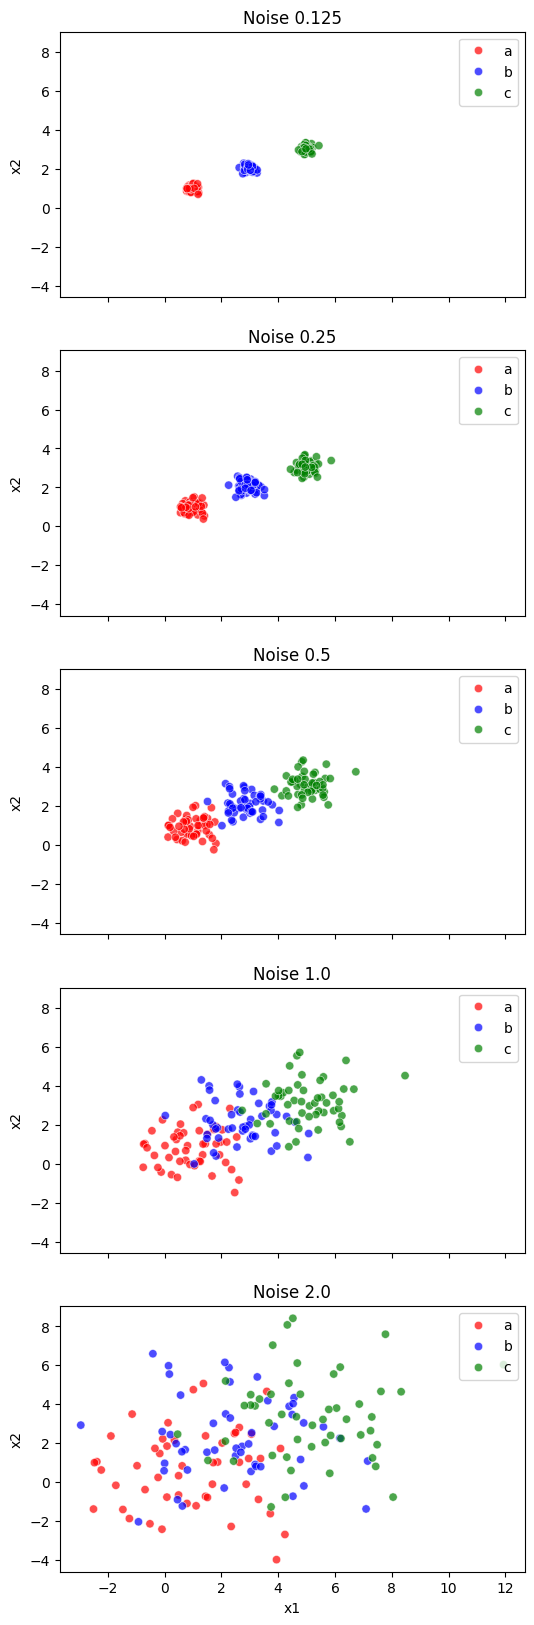

In [6]:
#2

import seaborn as sns
import matplotlib.pyplot as plt

datasets = {
    "Noise 0.125": df0_125,
    "Noise 0.25": df0_25,
    "Noise 0.5": df0_5,
    "Noise 1.0": df1_0,
    "Noise 2.0": df2_0
}

fig, axes = plt.subplots(5, 1, figsize=(6, 20), sharex=True, sharey=True)
for ax, (title, df) in zip(axes, datasets.items()):
    sns.scatterplot(
        data=df,
        x="x1", y="x2",
        hue="group",
        palette={"a":"red","b":"blue","c":"green"},
        ax=ax,
        alpha=0.7
    )
    ax.set_title(title, fontsize=12)
    ax.legend(loc="upper right")

# As noise increases, clusters spread out more
# At low noise they are tight and distinct
# At higher noise points are spread over plot, groups become less distinct

Text(0.5, 1.0, 'Comparison of Different Noise Levels')

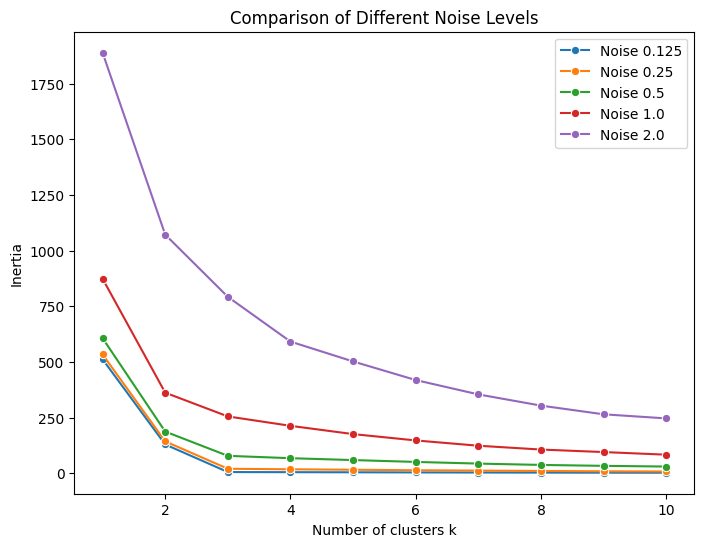

In [7]:
#3

from sklearn.cluster import KMeans

def scree_values(df, k_bar=10):
    X = df[["x1", "x2"]].values
    SSE = []
    for k in range(1, k_bar+1):
        model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        SSE.append(model.inertia_)
    return SSE

datasets = {
    "Noise 0.125": df0_125,
    "Noise 0.25": df0_25,
    "Noise 0.5": df0_5,
    "Noise 1.0": df1_0,
    "Noise 2.0": df2_0
}

plt.figure(figsize=(8,6))

for label, df in datasets.items():
    SSE = scree_values(df, k_bar=10)
    sns.lineplot(x=np.arange(1, 11), y=SSE, marker="o", label=label)

plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.title("Comparison of Different Noise Levels")

# As noise increases, scree plot flattens
# At low noise there is a sharp elbow at k=3, making it easy to pick k val
# At higher noise, elbow becomes less clear, making it harder to pick k val

In [8]:
#4

# The elbow shows point where adding more clusters doesn’t reduce the within-cluster error much
# At low noise, adding clusters beyond k=3 barely improves SSE, so the elbow is clear
# At higher noise, spreading points make additional clusters reduce SSE gradually, so the elbow is less distinct

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [9]:
#1

df = pd.read_csv("./clustering_assignment/data/2022 election cycle fundraising.csv")
df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [10]:
for col in ["Raised", "Spent", "Cash on Hand", "Debts"]:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)
df.head()

# Cleaned rows by removing $ and commas and converting vals to numeric

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3802027961.py:2: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


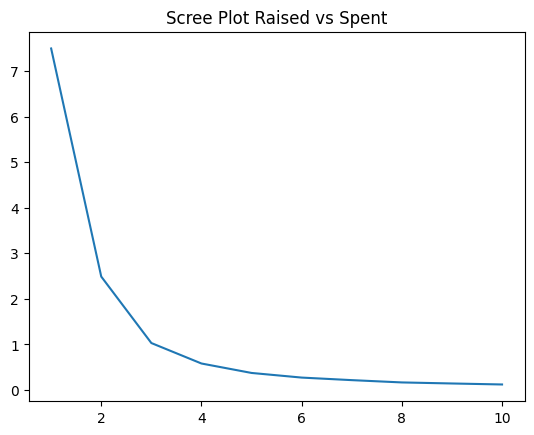

In [11]:
#2

def maxmin(x):
    return (x - x.min()) / (x.max() - x.min())

df["Raised_norm"] = maxmin(df["Raised"])
df["Spent_norm"] = maxmin(df["Spent"])

k_bar = 10
SSE = []

X1 = df[["Raised_norm", "Spent_norm"]].values

for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
    model.fit(X1)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title("Scree Plot Raised vs Spent")

Text(0.5, 1.0, 'Clustering Raised vs Spent')

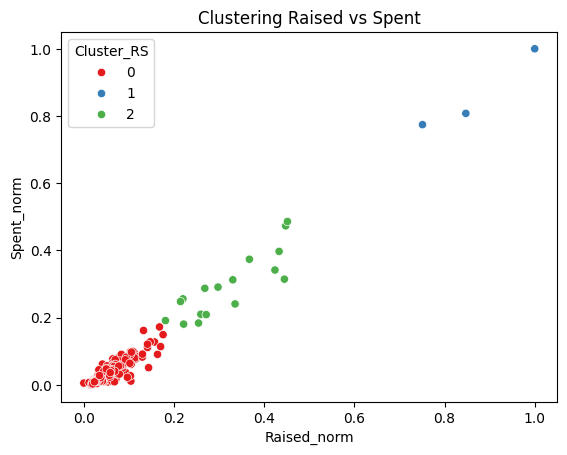

In [12]:
k = 3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(X1)
df["Cluster_RS"] = kmeans1.labels_

sns.scatterplot(data=df, x="Raised_norm", y="Spent_norm", hue="Cluster_RS", palette="Set1")
plt.title("Clustering Raised vs Spent")

# Clusters 1 and 2 are much smaller than Cluster 3
# The smallest two clusters, 1 and 2, contain the campaigns with the highest fundraising

In [13]:
small_2_clusters = df[df["Cluster_RS"].isin([1, 2])]
small_2_clusters[["Member", "Raised", "Spent", "Cluster_RS"]]

# Many high fundraising campiagns involved close races
# High fundraising does not mean a safe win, often means high-stakes and competitve race

,Member,Raised,Spent,Cluster_RS
2,Adam Schiff,20993041.0,13957854.0,2
87,Catherine Cortez Masto,37993811.0,35928936.0,2
89,Chuck Schumer,35899966.0,25944350.0,2
115,Dan Crenshaw,14535870.0,14512435.0,2
261,John Kennedy,28119082.0,18276565.0,2
290,Katie Porter,21441693.0,15946876.0,2
298,Kevin McCarthy,24791538.0,22086344.0,2
326,Maggie Hassan,30914830.0,28380992.0,2
328,Marco Rubio,36709285.0,30153111.0,2
340,Mark Kelly,73140886.0,61357281.0,1


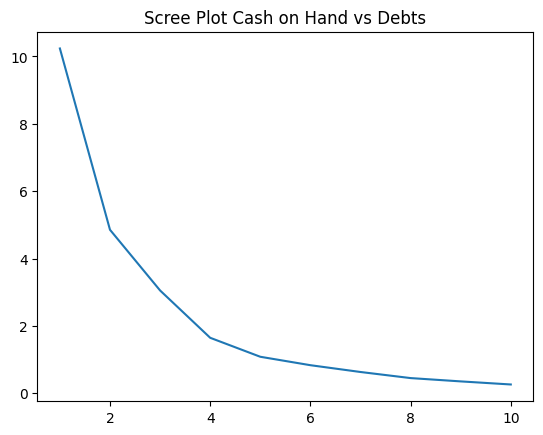

In [14]:
#3

def maxmin(x):
    return (x - x.min()) / (x.max() - x.min())

df["Coh_norm"] = maxmin(df["Cash on Hand"])
df["Debts_norm"] = maxmin(df["Debts"])

k_bar = 10
SSE = []

X1 = df[["Coh_norm", "Debts_norm"]].values

for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
    model.fit(X1)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title("Scree Plot Cash on Hand vs Debts")

Text(0.5, 1.0, 'Clustering Cash on Hand vs Debts')

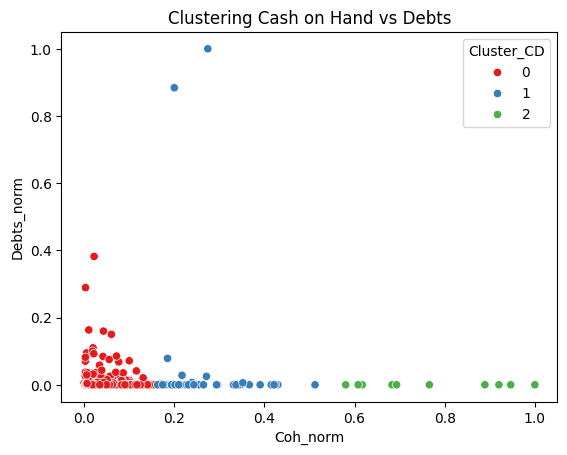

In [15]:
k = 3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(X1)
df["Cluster_CD"] = kmeans1.labels_

sns.scatterplot(data=df, x="Coh_norm", y="Debts_norm", hue="Cluster_CD", palette="Set1")
plt.title("Clustering Cash on Hand vs Debts")

# Clusters 1 and 2 are smaller
# Both clusters have mainly low debts, close to 0 or 0
# A few outliers in Cluster 1 with high debts
# Cluster 2 has highest cash on hand and lowest debts

In [16]:
small_2_clusters2 = df[df["Cluster_CD"].isin([1, 2])]
small_2_clusters2[["Member", "Cash on Hand", "Debts", "Cluster_CD"]]

# Some top fundraisers from Raised vs Spent are in larger clusters because they spent most of their money
# Cash/Debts clusters highlight financial liquidity rather than total fundraising, shows differences in clusters

# Incumbent candidates are typically more likely to have larger winning margains, they will likely have the most money to spend
# Though, they may over/under spend affecting their Cash/Debt
# Contributing factors could also be wealth of the state they run in/political affiliation

,Member,Cash on Hand,Debts,Cluster_CD
2,Adam Schiff,20942888.0,0.0,2
11,Alex Padilla,7617654.0,5703.0,1
12,Alexandria Ocasio-Cortez,5940454.0,0.0,1
45,Bernie Sanders,9751125.0,0.0,1
49,Bill Foster,4164390.0,1046178.0,1
87,Catherine Cortez Masto,5089745.0,0.0,1
89,Chuck Schumer,20231213.0,0.0,2
100,Chrissy Houlahan,5763037.0,0.0,1
101,Christopher S. Murphy,4177754.0,0.0,1
103,Chuck Grassley,3905425.0,0.0,1


Text(0.5, 1.0, 'Scree Plot All Variables')

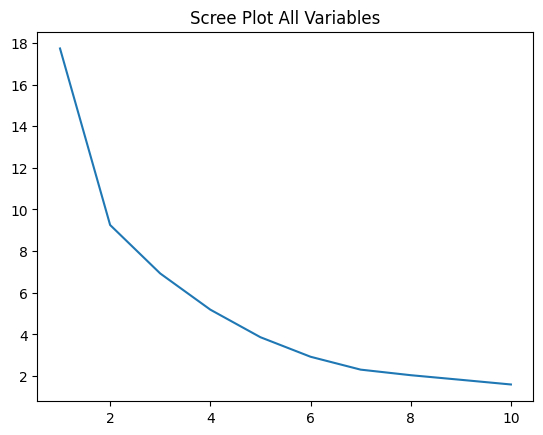

In [17]:
#4

X_all = df[["Raised_norm", "Spent_norm", "Coh_norm", "Debts_norm"]].values

SSE = []
k_bar = 10
for k in range(1, k_bar+1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_all)
    SSE.append(model.inertia_)

sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title("Scree Plot All Variables")

In [18]:
k = 3
kmeans_all = KMeans(n_clusters=k, random_state=0).fit(X_all)
df["Cluster_all"] = kmeans_all.labels_

df.groupby("Cluster_all").size()

# Including all 4 variables, most candidates fall into cluster 0, cluster 1 and 2 much smaller
# Small cluster holds extreme outliers
# Medium cluster captures candidates with distinctive money patterns (ex: high raised/spent but low debt)

# Compared to Raised/Spent, separation is less clear
# Compared to Cash/Debts, more variety, but clusters still overlap

,0
Cluster_all,
0,502
1,3
2,32


In [24]:
df[df["Cluster_all"] == 1][["Member", "Raised", "Spent", "Cash on Hand", "Debts"]]

# These candidates have the most extreme financial profiles, high raised and spending vals, high cash on hand
# k-means isolates extreme cases into their own clusters

,Member,Raised,Spent,Cash on Hand,Debts
340,Mark Kelly,73140886.0,61357281.0,13186127.0,0.0
417,Raphael Warnock,86581469.0,75959810.0,22762985.0,0.0
523,Val Demings,64682883.0,58806664.0,6647641.0,0.0


In [ ]:
#5

# 𝑘 -MC algorithm was useful in isolating extreme outliers, helps draw conclusions about races that are particularly high-profile
# Sorting clusters by size reveals dominant patterns
# Clustering makes large data set more digestible

# 𝑘 -MC algorithm does not directly tell us about how tight the race was, extra information needs to be obtained
# Combining more variables leads to more overlap in clusters, making it difficult to draw distinctions

Academic Integrity: AI used for troubleshooting purposes for this assignment

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?